In [9]:
# Q1: Install and load the latest versions of TensorFlow and Keras.
!pip install tensorflow keras

import tensorflow as tf
from tensorflow import keras

# Print the versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

# Q2: Load the Wine Quality dataset and explore its dimensions.
import pandas as pd

# Replace 'path_to_dataset' with the actual path to the dataset on your machine.
data = pd.read_csv('wine.csv')

# Explore the dimensions of the dataset
print("Dataset dimensions:", data.shape)

# Q3: Check for null values, identify categorical variables, and encode them.
# Check for null values
null_values = data.isnull().sum()
print("Null values in the dataset:\n", null_values)

# data=data[:-1]

# Identify categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_columns)

# Encode categorical variables (assuming we want to use one-hot encoding)
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Q4: Separate the features and target variables from the dataset.
X = data_encoded.drop(columns=['quality_good'])
y = data_encoded['quality_good']

# Q5: Perform a train-test split, dividing the data into training, validation, and test datasets.
from sklearn.model_selection import train_test_split

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the dimensions of the split datasets
print("Training data dimensions:", X_train.shape, y_train.shape)
print("Validation data dimensions:", X_val.shape, y_val.shape)
print("Test data dimensions:", X_test.shape, y_test.shape)

TensorFlow version: 2.12.0
Keras version: 2.12.0
Dataset dimensions: (1599, 12)
Null values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical variables: Index(['quality'], dtype='object')
Training data dimensions: (1119, 11) (1119,)
Validation data dimensions: (240, 11) (240,)
Test data dimensions: (240, 11) (240,)


In [13]:
# Q6: Scale the dataset using an appropriate scaling technique (e.g., StandardScaler).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Q7: Design and implement at least two hidden layers and an output layer for the binary categorical variables.
from keras.models import Sequential
from keras.layers import Dense

# Q8: Create a Sequential model in Keras and add the previously designed layers to it.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Q9: Print the summary of the model architecture.
model.summary()

# Q10: Set the loss function ('binary_crossentropy'), optimizer, and include the accuracy metric in the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
35/35 [==============================] - 4s 38ms/step - loss: 0.6413 - accuracy: 0.6515 - val_loss: 0.6082 - val_accuracy: 0.6792
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.5607 - accuracy: 0.7391 - val_loss: 0.5828 - val_accuracy: 0.6875
Epoch 3/50
35/35 [==============================] - 0s 11ms/step - loss: 0.5283 - accuracy: 0.7435 - val_loss: 0.5798 - val_accuracy: 0.6750
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.5138 - accuracy: 0.7525 - val_loss: 0.5653 - val_accuracy: 0.6875
Epoch 5/50
35/35 [==============================] - 0s 13ms/step - loss: 0.5002 - accuracy: 0.7614 - val_loss: 0.5663 - val_accuracy: 0.6667
Epoch 6/50
35/35 [==============================] - 0s 12ms/step - loss: 0.4935 - accuracy: 0.7694 - val_loss: 0.5615 - val_accuracy: 0.6708
Epoch 7/50
35/35 [==============================] - 0s 10ms/step - loss: 0.4899 - accuracy: 0.7685 - val_loss: 0.5591 - val_accuracy: 0.6833
Epoch 8/50
35/

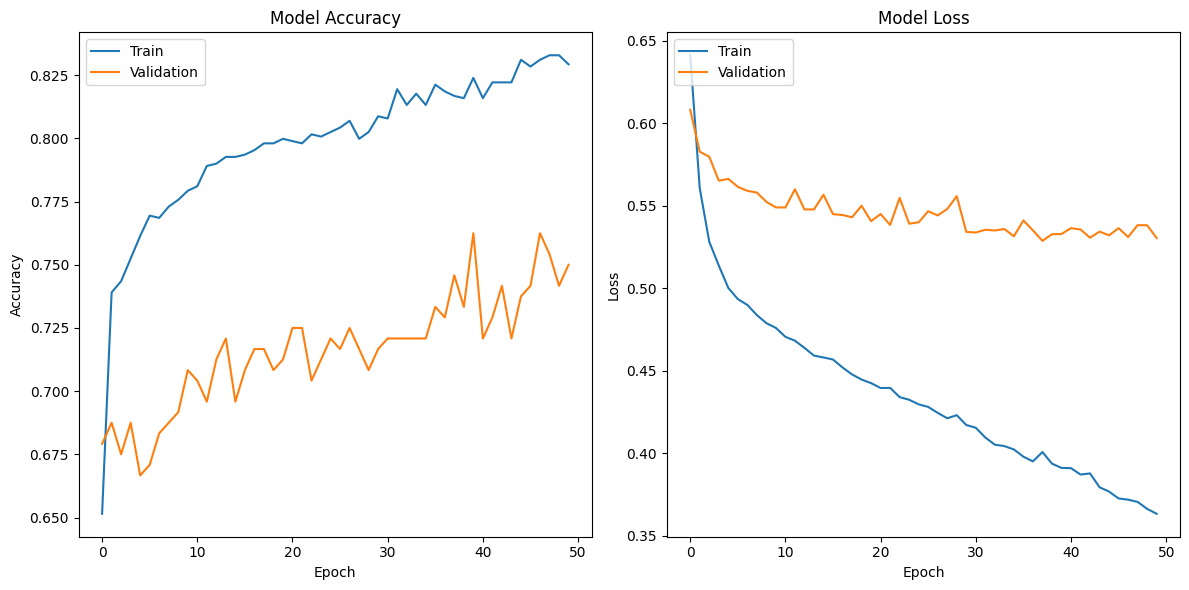

Test Loss: 0.4456
Test Accuracy: 77.92%


In [14]:
# Q11: Compile the model with the specified loss function, optimizer, and metrics (already done).
# Q12: Fit the model to the training data using an appropriate batch size and number of epochs.
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,  # Adjust batch size as needed
    epochs=50,      # Adjust the number of epochs as needed
    verbose=1       # Set to 1 for training progress updates
)

# Q13: Obtain the model's parameters (weights and biases).
model_params = model.get_weights()

# Q14: Store the model's training history as a Pandas DataFrame.
import pandas as pd

history_df = pd.DataFrame(history.history)

# Q15: Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Q16: Evaluate the model's performance using the test dataset and report relevant metrics.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")